In [2]:
import pandas as pd
import seaborn as sns

# Overview of the income, dependent variable

In [83]:
income = pd.read_csv('income_county_clean.csv')

In [84]:
income.head()

,County Name,2018,2019,2020
0,United States,"54,098","56,047",59510.0
1,Alabama,"42,328","43,996",46479.0
2,Autauga,"42,931","44,368",46814.0
3,Baldwin,"46,905","48,270",50953.0
4,Barbour,"34,064","35,572",37850.0


Even though the dataset is stated as on the county level, there is county as well as the state level statistics, so need to remove the state-level and United States

In [85]:
income = income.rename(columns={'County Name': 'County&State'})

In [104]:
#remove any null values
income = income[income['County&State'].notna()]
income['County&State'].isnull().sum()

0

In [109]:
#get a copy of the state names from the Internet
state_names = ["United States", "Alaska", "Alabama", "Arkansas", "American Samoa", 
               "Arizona", "California", "Colorado", "Connecticut", 
               "District ", "of Columbia", "Delaware", "Florida", 
               "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", 
               "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
               "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", 
               "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", 
               "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [110]:
#filter out the states, and only county
income.loc[:,'only_county'] = income.loc[:,'County&State'].apply(lambda x: " ".join(x for x in x.split() if x not in state_names))
#filter out the county, and keep the state
#income.loc[:, 'only_state'] = income.loc[:,'County&State'].apply(lambda x: " ".join(x for x in x.split() if x in state_names))

In [111]:
income = income[income['only_county'] != '']
income = income.drop(0)

In [126]:
#get the county level data, convert to numerical
county_income = income[['only_county', '2020']]
county_income.loc[:, "2020"] = pd.to_numeric(county_income.loc[:, "2020"])

In [127]:
county_income.describe()

,2020
count,3067.000000
mean,49079.465602
std,13178.245679
min,21087.000000
25%,41069.000000
50%,46679.000000
75%,54038.000000
max,220645.000000


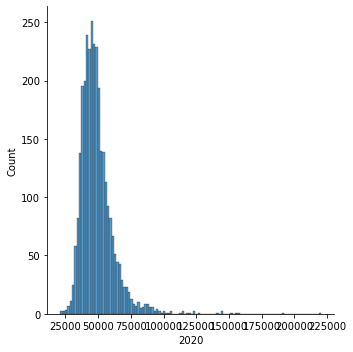

In [129]:
sns.displot(county_income, x="2020")

# Overview of the control variables

In [130]:
combine = pd.read_csv('combine_data.csv')

In [131]:
combine.head()

,id,Geographic Area Name,Total Population,Female Total Population,Female Percentage,Male Percentage,Married percentage,50% below the poverty level,Poverty level percentage,High school graduate (includes equivalency) (18-24),...,Not Hispanic nor Latino,Hispanic or Latino population percentage,Not Hispanic nor Lation population percentage,White,Black or African American,American Indian and Alaska Native alone,Asian,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Unnamed: 34
0,0500000US01001,"Autauga County, Alabama",55639,28587,51.38%,48.62%,52.0,3504,6.30%,1723,...,56688,3.80%,96.20%,41582,11352,184,873,22,185,NaN
1,0500000US01003,"Baldwin County, Alabama",218289,112400,51.49%,48.51%,55.2,7250,3.32%,5569,...,219081,5.81%,94.19%,186495,18001,1291,2029,122,775,NaN
2,0500000US01005,"Barbour County, Alabama",25026,11870,47.43%,52.57%,38.5,3018,12.06%,875,...,23713,6.03%,93.97%,11086,11850,58,103,0,63,NaN
3,0500000US01007,"Bibb County, Alabama",22374,10352,46.27%,53.73%,42.2,1875,8.38%,1104,...,21553,3.31%,96.69%,16442,4390,39,26,9,47,NaN
4,0500000US01009,"Blount County, Alabama",57755,29078,50.35%,49.65%,56.0,3834,6.64%,1833,...,53363,9.99%,90.01%,49764,826,188,174,11,100,NaN


In [11]:
combine["Female Percentage"] = combine["Female Percentage"].str.replace('\%','')

<ipython-input-11-f667cbe9f305>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine["Female Percentage"] = combine["Female Percentage"].str.replace('\%','')


In [12]:
combine["Female Percentage"] = pd.to_numeric(combine["Female Percentage"])

In [13]:
combine["Female Percentage"].describe()

count    3221.000000
mean       49.952965
std         2.473019
min        29.060000
25%        49.400000
50%        50.400000
75%        51.180000
max        58.010000
Name: Female Percentage, dtype: float64

In [61]:
combine["Married percentage"] = pd.to_numeric(combine["Married percentage"])

In [62]:
combine["Married percentage"].describe()

count    3221.000000
mean       50.972245
std         7.455424
min        20.500000
25%        46.700000
50%        51.600000
75%        55.800000
max        82.100000
Name: Married percentage, dtype: float64

In [63]:
combine["Poverty level percentage"] = combine["Poverty level percentage"].str.replace('\%','')

<ipython-input-63-b1ec60d8c060>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine["Poverty level percentage"] = combine["Poverty level percentage"].str.replace('\%','')


In [64]:
combine["Poverty level percentage"] = pd.to_numeric(combine["Poverty level percentage"])

In [65]:
combine["Poverty level percentage"].describe()

count    3221.000000
mean        6.514154
std         4.320342
min         0.000000
25%         4.080000
50%         5.570000
75%         7.500000
max        39.360000
Name: Poverty level percentage, dtype: float64

In [66]:
combine["High school degree percentage"] = combine["High school degree percentage"].str.replace('\%','')

<ipython-input-66-1dddb9b64da7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine["High school degree percentage"] = combine["High school degree percentage"].str.replace('\%','')


In [67]:
combine["High school degree percentage"] = pd.to_numeric(combine["High school degree percentage"])

In [68]:
combine["High school degree percentage"].describe()

count    3221.000000
mean       26.627740
std         5.697803
min         5.640000
25%        22.820000
50%        26.660000
75%        30.700000
max        52.040000
Name: High school degree percentage, dtype: float64

# Overview of the interested variable Covid

In [14]:
covid_19 = pd.read_csv('us-counties.csv')

In [132]:
covid_19.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [21]:
county_withdup = []
for col in covid_19.county:
    county_withdup.append(col)

In [27]:
def unique(county):
    unique_county = []
    for x in county:
        if x not in unique_county:
            unique_county.append(x)
    return unique_county

In [28]:
unique_county = unique(county_withdup)

In [30]:
len(unique_county)

1932

Here we can see that there is missing data for the Covid-19 cases for all counties